In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/Final_SP_dataSet.csv')
dataset.head()

,Age,Gender,Stress Level,Academic Performance,Health Condition,Relationship Condition,Family Problem,Depression Level,Anxiety Level,Mental Support,Self Harm Story,Suicide Attempt
0,22,Female,Low,Good,Normal,In a relationship,NaN,Always,Always,Family,No,Never Thought
1,23,Male,High,Good,Fair,Single,NaN,Always,Often,loneliness,Yes,Attempted
2,19,Female,Moderate,Poor,Normal,Breakup,Parental conflict,Often,Often,Friends,Yes,Thought
3,18,Female,High,Average,Abnormal,Single,Financial,Always,Often,loneliness,Yes,Thought
4,19,Female,Low,Good,Fair,Single,NaN,Sometimes,Sometimes,Family,No,Never Thought


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1099 non-null   int64 
 1   Gender                  1099 non-null   object
 2   Stress Level            1099 non-null   object
 3   Academic Performance    1099 non-null   object
 4   Health Condition        1099 non-null   object
 5   Relationship Condition  1099 non-null   object
 6   Family Problem          693 non-null    object
 7   Depression Level        1099 non-null   object
 8   Anxiety Level           1099 non-null   object
 9   Mental Support          1099 non-null   object
 10  Self Harm Story         1099 non-null   object
 11  Suicide Attempt         1099 non-null   object
dtypes: int64(1), object(11)
memory usage: 103.2+ KB


In [ ]:
dataset = dataset.drop(columns = ['Family Problem'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1099 non-null   int64 
 1   Gender                  1099 non-null   object
 2   Stress Level            1099 non-null   object
 3   Academic Performance    1099 non-null   object
 4   Health Condition        1099 non-null   object
 5   Relationship Condition  1099 non-null   object
 6   Depression Level        1099 non-null   object
 7   Anxiety Level           1099 non-null   object
 8   Mental Support          1099 non-null   object
 9   Self Harm Story         1099 non-null   object
 10  Suicide Attempt         1099 non-null   object
dtypes: int64(1), object(10)
memory usage: 94.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ['Gender','Stress Level','Academic Performance','Health Condition','Relationship Condition','Depression Level',
            'Anxiety Level','Mental Support','Self Harm Story','Suicide Attempt']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     1099 non-null   int64
 1   Gender                  1099 non-null   int64
 2   Stress Level            1099 non-null   int64
 3   Academic Performance    1099 non-null   int64
 4   Health Condition        1099 non-null   int64
 5   Relationship Condition  1099 non-null   int64
 6   Depression Level        1099 non-null   int64
 7   Anxiety Level           1099 non-null   int64
 8   Mental Support          1099 non-null   int64
 9   Self Harm Story         1099 non-null   int64
 10  Suicide Attempt         1099 non-null   int64
dtypes: int64(11)
memory usage: 94.6 KB


In [ ]:
x = dataset.drop(columns=['Suicide Attempt'])
y = dataset['Suicide Attempt']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = [KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression()]

errors = {}

for model in models:
    model.fit(x_train,y_train)
    name = type(model).__name__
    score = model.score(x_test,y_test)*100
    errors[name] = score

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
errors

{'KNeighborsClassifier': 75.45454545454545,
 'DecisionTreeClassifier': 79.0909090909091,
 'RandomForestClassifier': 83.63636363636363,
 'LogisticRegression': 78.18181818181819}

<BarContainer object of 4 artists>

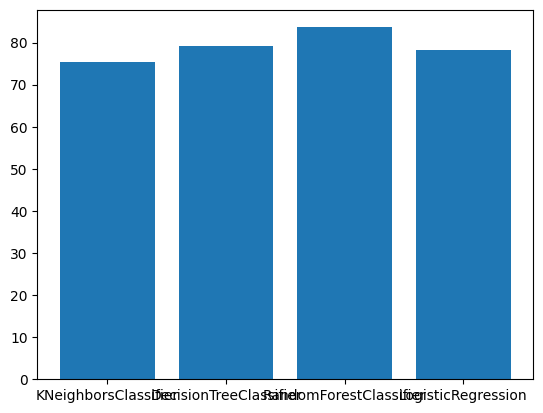

In [ ]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())

/tmp/ipython-input-1914427465.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


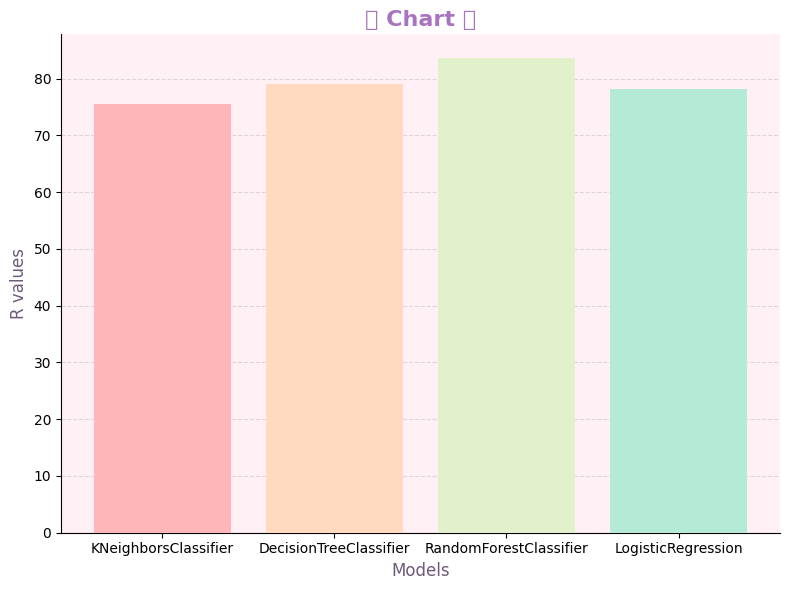

In [ ]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()